In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import matplotlib.dates as mdates

In [2]:
#change data path to ../data/TH2/*.cdf for TH2 graph
DATA_PATH = '../data/TH1/*.cdf'

In [3]:
import sys
import os
sys.path.append(os.path.abspath('../Scripts'))

from TH_parameters import loadfiles

In [4]:
all_time, all_energy, all_flux = loadfiles(DATA_PATH)

In [5]:
time_grid, energy_grid = np.meshgrid(all_time, all_energy[0], indexing='ij')

/home/kanishk/repos/arka-isro-hackathon/env/lib/python3.12/site-packages/matplotlib/dates.py:449: UserWarning: no explicit representation of timezones available for np.datetime64
  d = d.astype('datetime64[us]')


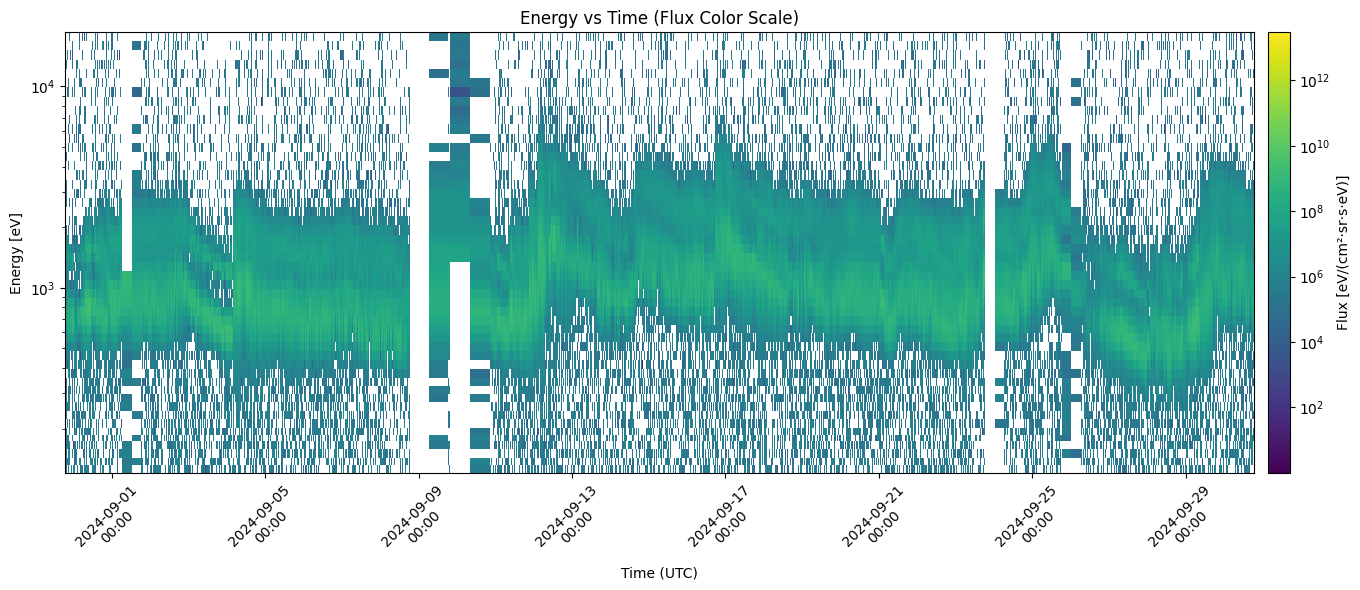

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
pcm = ax.pcolormesh(time_grid, energy_grid, all_flux, shading='auto', cmap='viridis', norm=LogNorm())
ax.set_yscale('log')
ax.set_ylabel("Energy [eV]")
ax.set_xlabel("Time (UTC)")
ax.set_title("Energy vs Time (Flux Color Scale)")

# X-axis formatting
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
plt.xticks(rotation=45)

# Colorbar
cbar = fig.colorbar(pcm, ax=ax, label="Flux [eV/(cm²·sr·s·eV)]", pad=0.01)
plt.tight_layout()
plt.show()